In [4]:
# %matplotlib inline
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import os;
from health.utils import  load_trimaing_data ,slugify

%reload_ext autoreload
%autoreload 2


TARGET='Depression'

df = load_trimaing_data()
print("total rows",len(df)) 

column_names = df.keys().to_list()
column_names.remove('id')
 


total rows 75000


In [5]:

# Print the count of each distinct value in each column



for column in column_names:
    
    slug = slugify(column); 
    print(f"Counts for column '{column}':")
    stats = df[column].value_counts(sort=False);
    stats.sort_index()
    print(stats)
    print("\n")
    # break

print(df.info())
print(df.describe())


Counts for column 'Gender':
Gender
Male      41376
Female    33624
Name: count, dtype: int64


Counts for column 'Age':
Age
35.0    1523
40.0    1643
39.0    1709
20.0    1848
30.0    1008
21.0    1473
41.0    1597
47.0    2263
33.0    1655
19.0    1443
34.0    1379
59.0    2029
28.0    1784
18.0    2096
23.0    1556
45.0    1891
36.0    1418
32.0     973
24.0    1824
44.0    1688
53.0    2431
48.0    1984
58.0    1577
57.0    2379
54.0    2060
25.0    1546
38.0    2443
27.0    1353
37.0    1480
26.0    1157
46.0    2187
29.0    1645
42.0    1823
56.0    2800
55.0    1519
60.0    1367
51.0    2079
49.0    2682
52.0    1342
43.0    2010
22.0    1103
50.0    1814
31.0    1419
Name: count, dtype: int64


Counts for column 'City':
City
Visakhapatnam    2778
Surat            2478
Hyderabad        2400
Rajkot           2782
Faridabad        1751
Ahmedabad        2929
Kolkata          3023
Mumbai           2663
Bangalore        2206
Ludhiana         2819
Delhi            1881
Srinagar        

Gender for Female     has    17.7%     5953,    33624
Gender for Male       has    18.5%     7657,    41376
Generated ../reports/figures/gender.png chart
Age for       18.0 has    69.6%     1459,     2096
Age for       19.0 has   62.16%      897,     1443
Age for       20.0 has   62.01%     1146,     1848
Age for       21.0 has   68.02%     1002,     1473
Age for       22.0 has   51.67%      570,     1103
Age for       23.0 has   56.55%      880,     1556
Age for       24.0 has   55.31%     1009,     1824
Age for       25.0 has   53.62%      829,     1546
Age for       26.0 has   42.17%      488,     1157
Age for       27.0 has   52.77%      714,     1353
Age for       28.0 has   52.63%      939,     1784
Age for       29.0 has   46.13%      759,     1645
Age for       30.0 has   32.53%      328,     1008
Age for       31.0 has   38.33%      544,     1419
Age for       32.0 has   41.62%      405,      973
Age for       33.0 has   29.54%      489,     1655
Age for       34.0 has    19.5

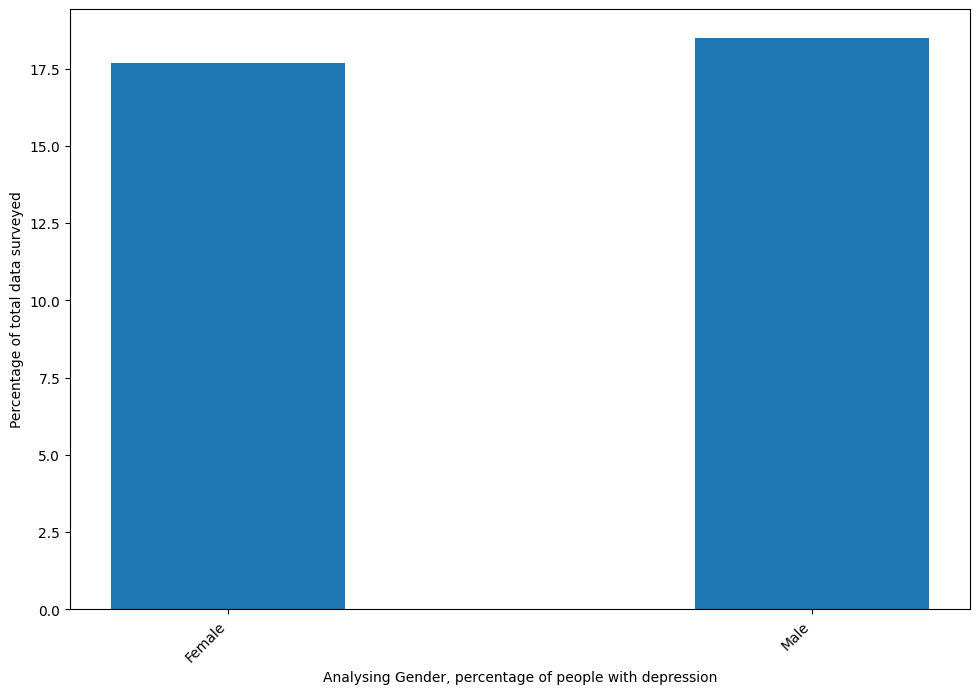

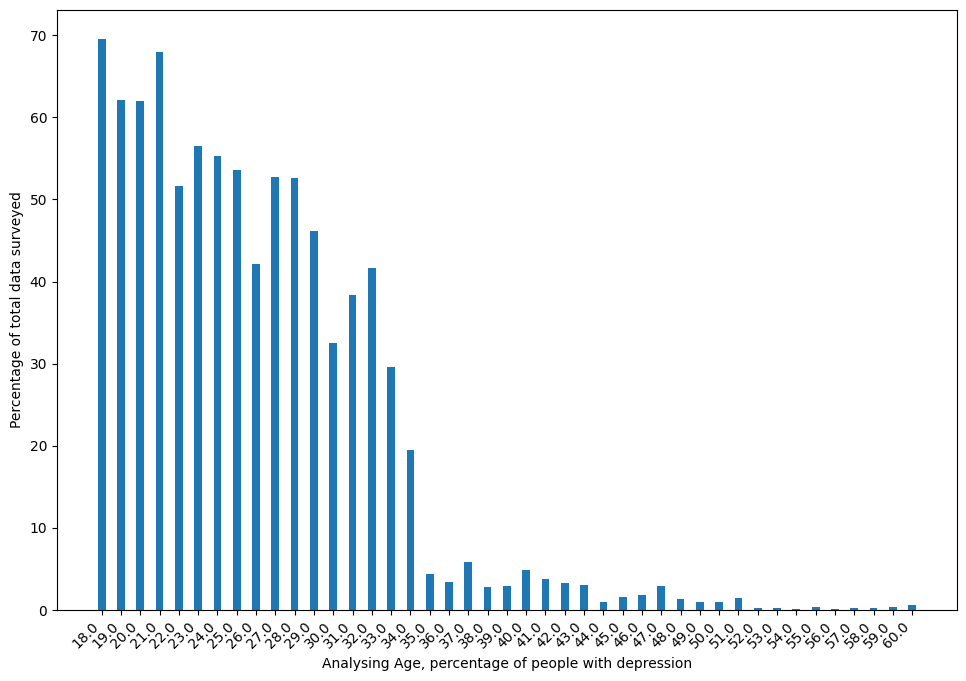

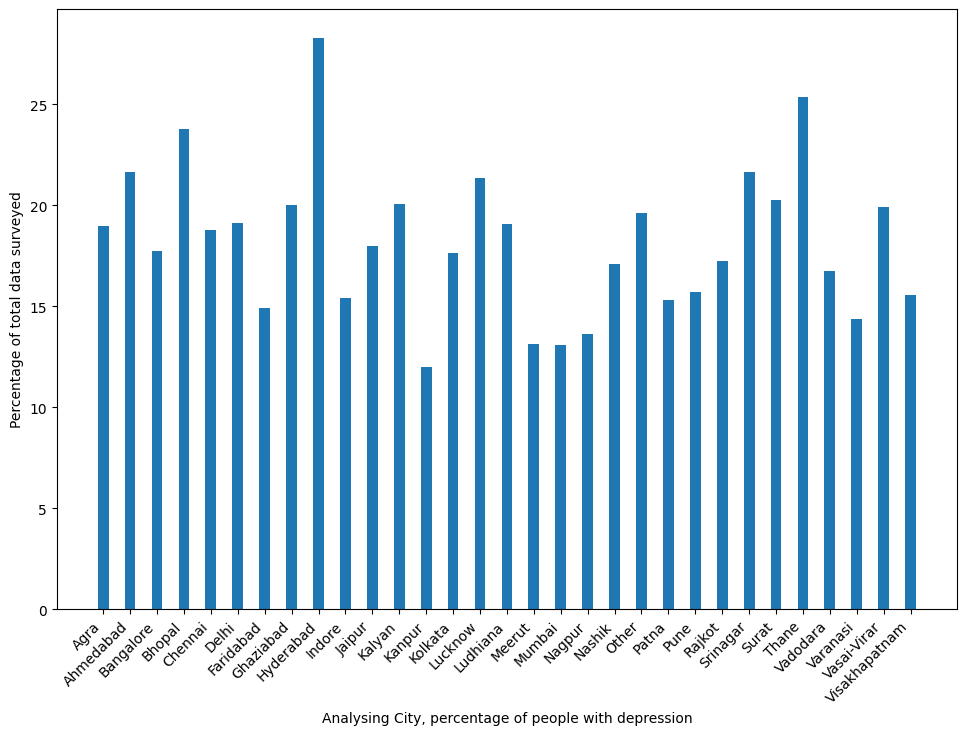

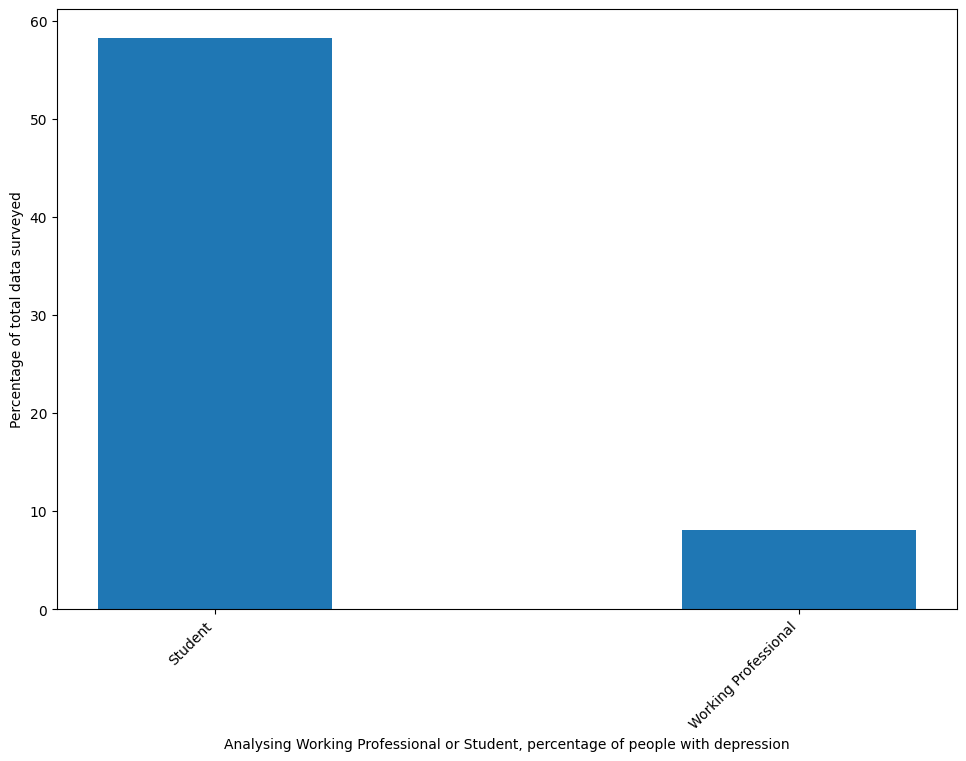

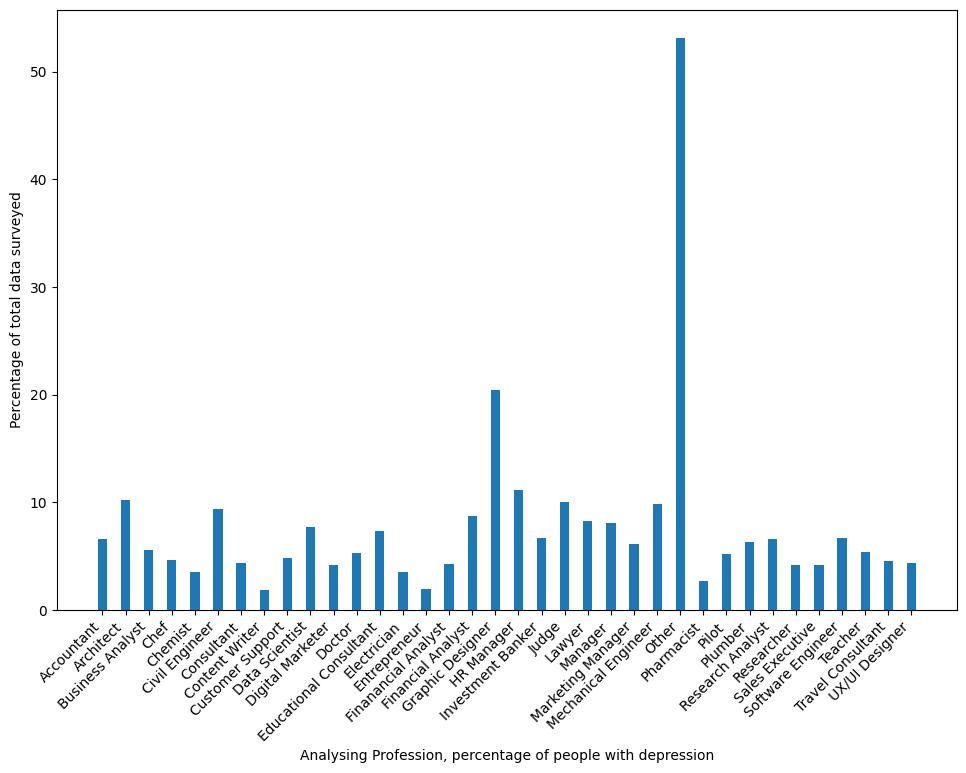

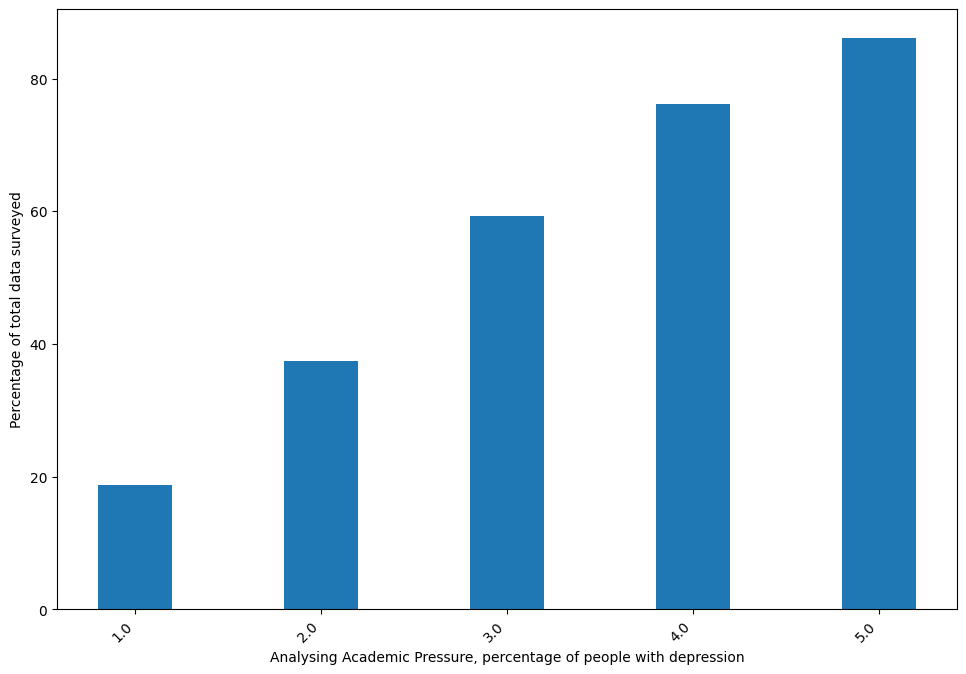

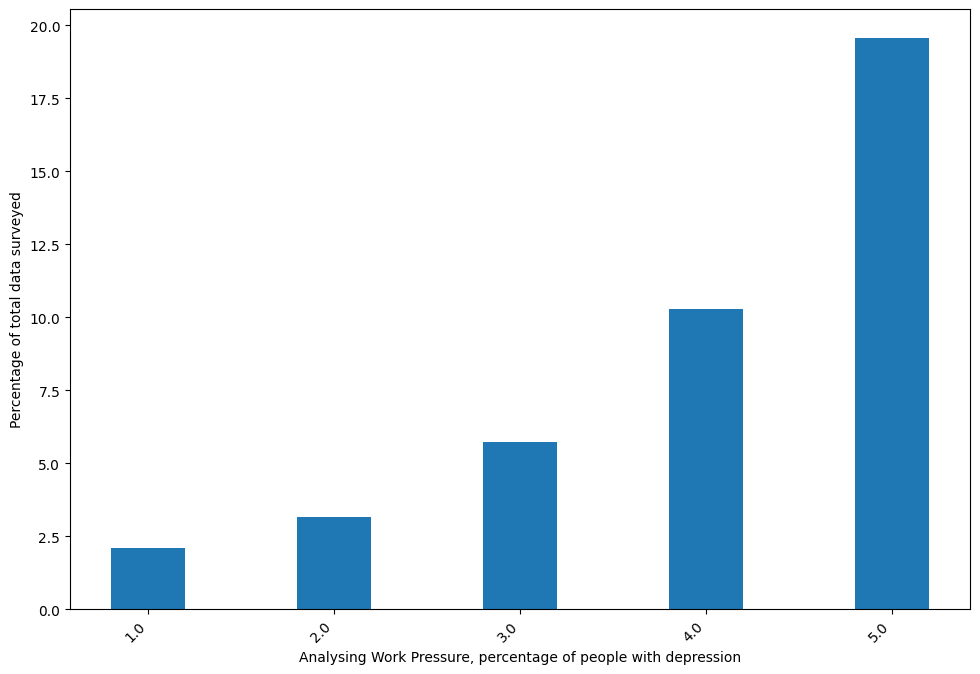

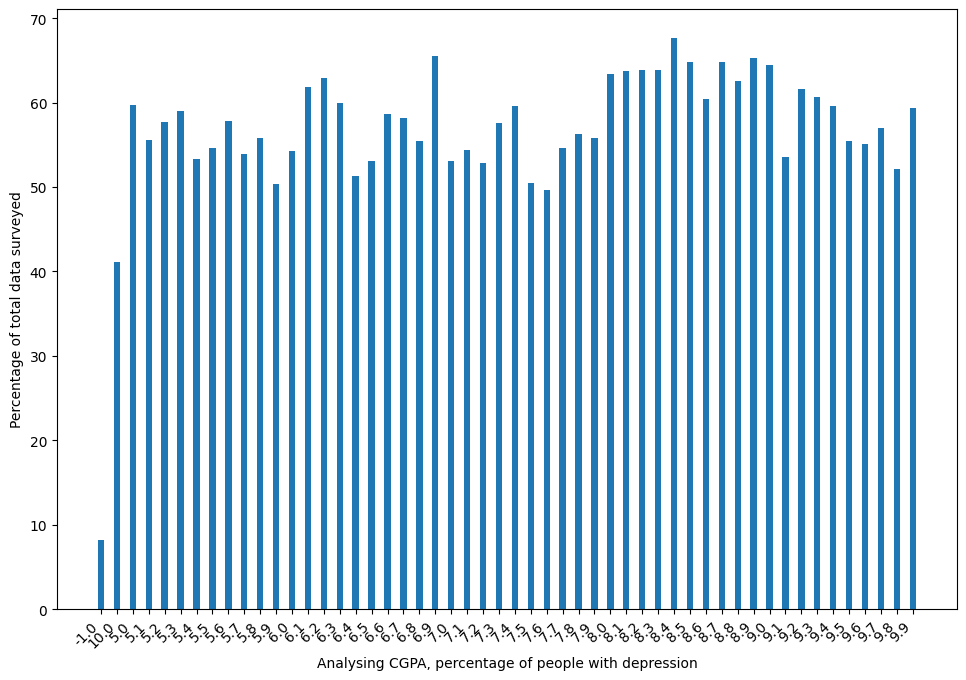

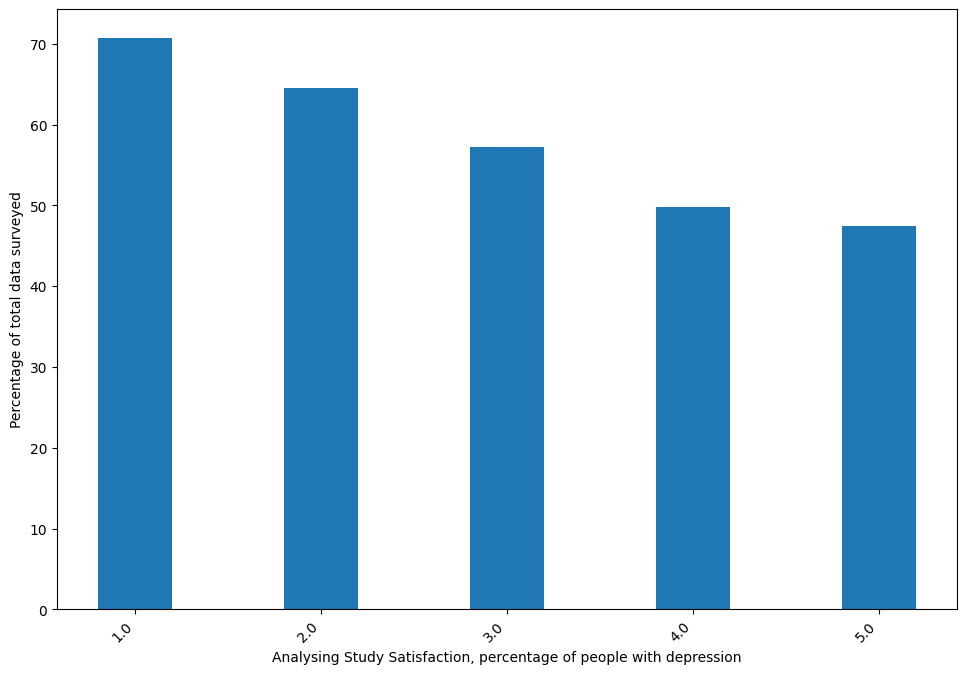

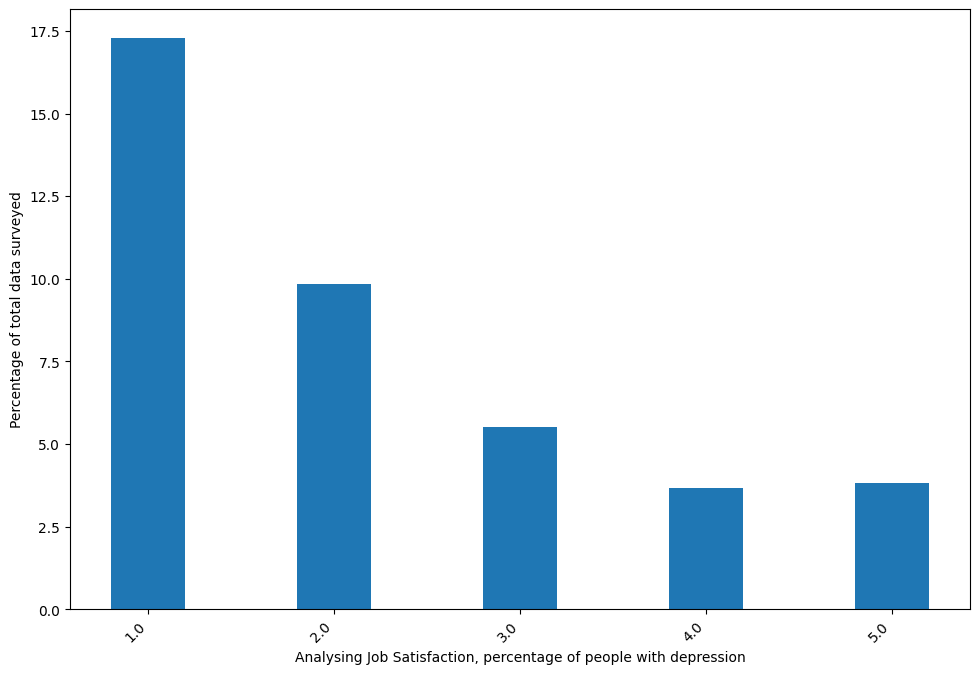

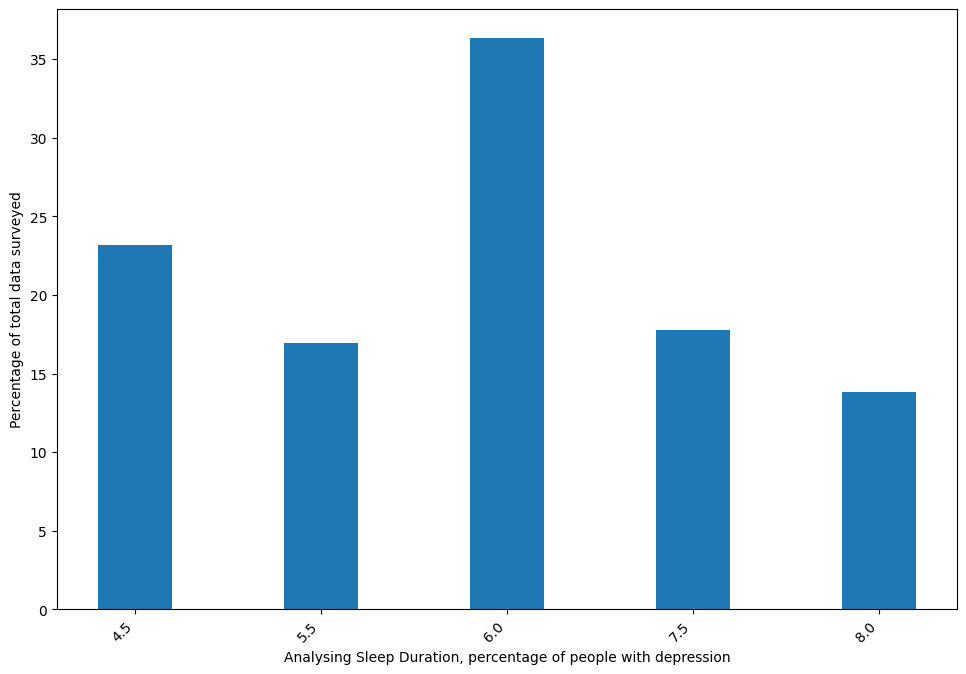

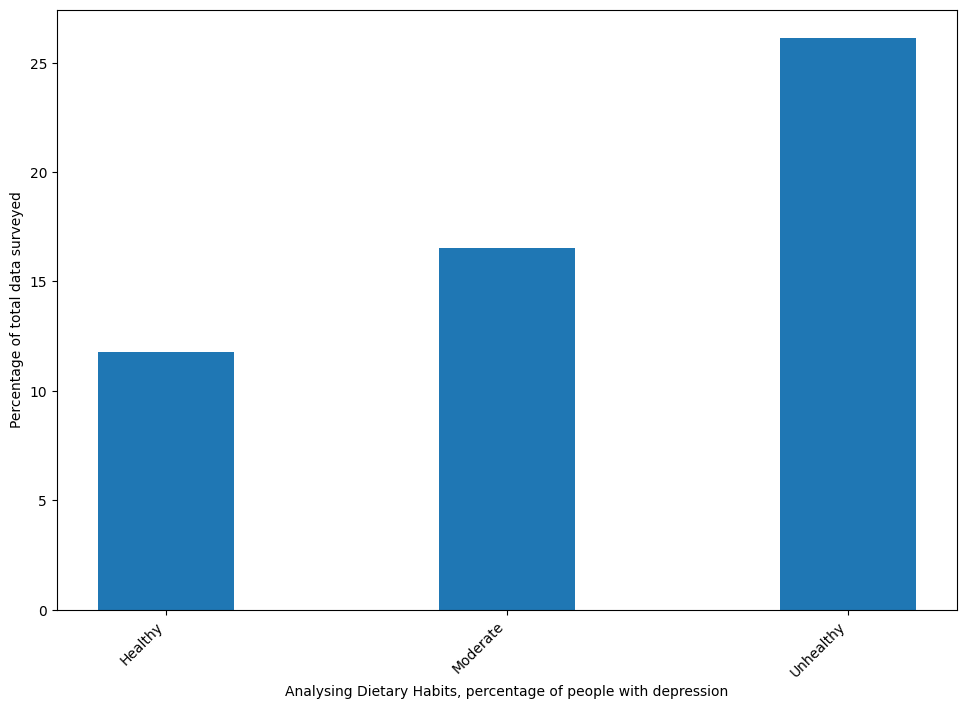

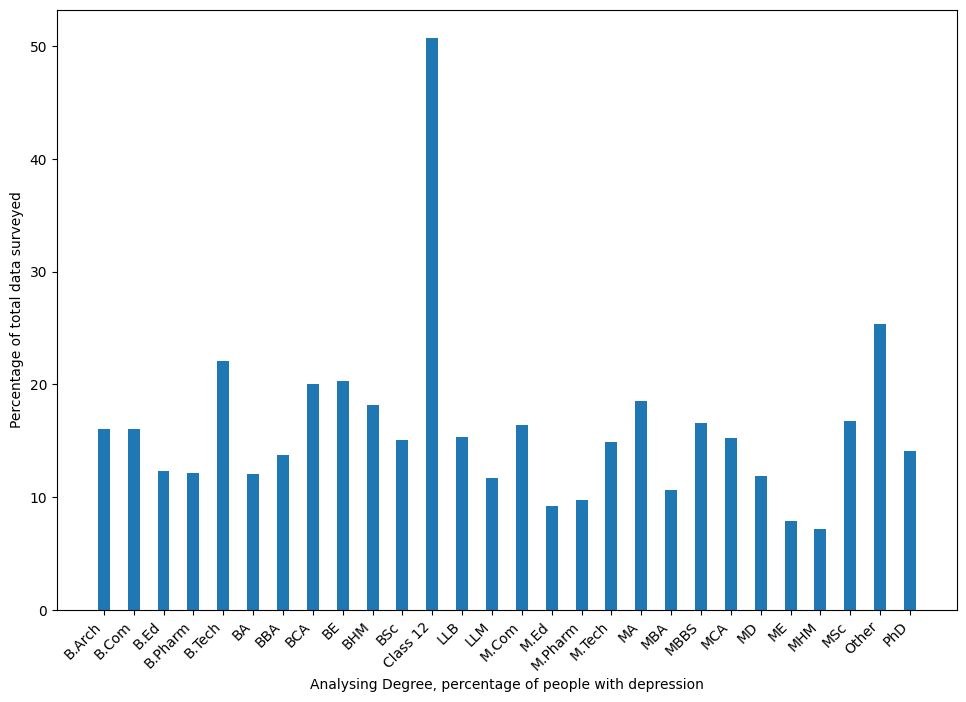

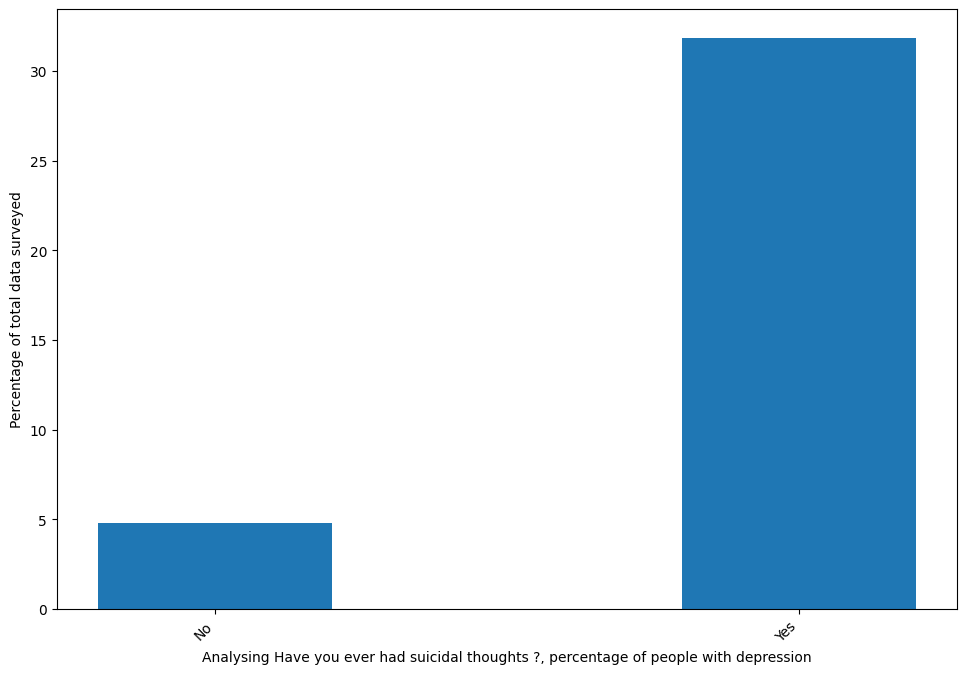

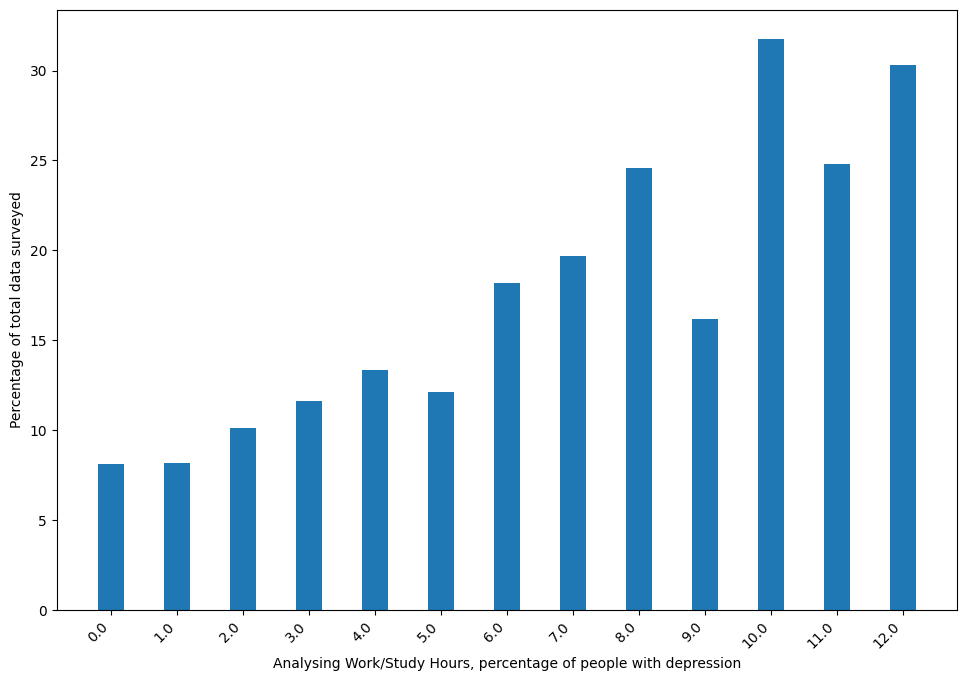

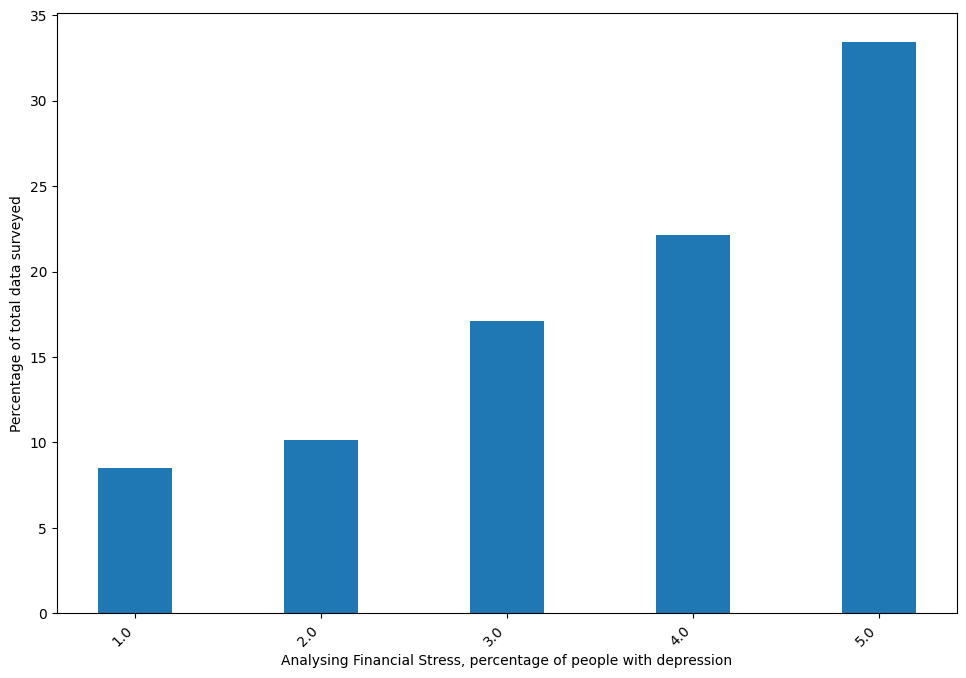

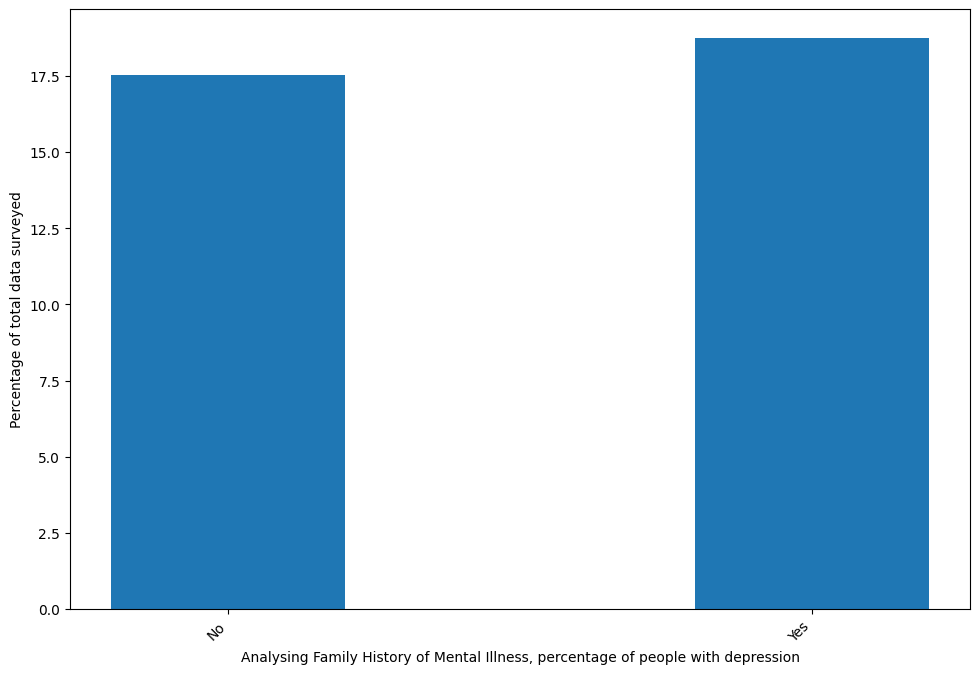

In [18]:

from cv2 import rotate


all_keys =  df.keys().to_list()

all_keys.remove('id')
all_keys.remove(TARGET)
# result['Gender']
# print(all_keys, result)


for key in all_keys:

    try :
            # result = df.groupby([key,TARGET]).value_count()
            figure = plt.figure(figsize=(10,8))
            axes = figure.add_axes([0.1,0.2,0.9, 0.75])
             
            axes.set_ylabel('Percentage of total data surveyed')
            axes.set_xlabel(f"Analysing {key}, percentage of people with depression")

            grouped_counts = df.groupby([key, TARGET])[TARGET].value_counts()
            df2 = grouped_counts.reset_index(name='Count')
            # print(df2)
            uq_list = df2[key].unique()
            # print(uq_list)
            names = []
            vals = []
            data_list = []
            dep_list = []
            for name in uq_list : 
               total = df2.loc[df2[key] == name, 'Count'].sum()
               if total < 10:
                    continue
               depressed = df2.loc[(df2[key] == name ) & (df2['Depression'] == "1"), 'Count'].sum() 
               names.append(name) 
               dep_list.append(depressed)
            
               perc =math.floor(depressed*10000/total)/100
               vals.append(perc)    
               data_list.append([name,perc,depressed,total])
               print(f"{key} for {name:10} has  {perc:>6}% {depressed:>8}, {total:>8}")
            # axes.plot(names,vals,)
            axes.bar(names, vals,0.4)
            axes.set_xticks(names)
            axes.set_xticklabels(names, rotation=45, ha='right')
            # axes.set_yticklabels(vals);
            rot = 0
            if (len(vals)> 6):
                 rot = 45
            # for i in range(0,len(vals)):
            #     axes.text(i,vals[i],f"{dep_list[i]}",ha="center", rotation=rot )
            target = f'../reports/figures/{slugify(key)}.png'
            figure.savefig(target)
            print(f"Generated {target} chart")


            stats = pd.DataFrame(np.array(data_list),columns=[key,'Percentage','Depressed','Total'])
             
            # print(stats)
            stats.to_csv(f"../reports/{slugify(key)}.csv")
            # if (key == 'City'):
                #  break
    except Exception as err:
        print("Error while",err)
    # break


    # plt.bar(depression_counts['Age'], depression_counts['Count'], color='skyblue')
 